# S&P 500 Simple General Exploratory Data Analysis Example 

## By Ori Rosenthal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib as u
from bs4 import BeautifulSoup as bs
%matplotlib inline

In [2]:
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

In [3]:
df = pd.read_html(sp500_url, header=0)[0]

In [4]:
df.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added[3][4],CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [5]:
df.shape

(505, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 9 columns):
Symbol                    505 non-null object
Security                  505 non-null object
SEC filings               505 non-null object
GICS Sector               505 non-null object
GICS Sub Industry         505 non-null object
Headquarters Location     505 non-null object
Date first added[3][4]    400 non-null object
CIK                       505 non-null int64
Founded                   174 non-null object
dtypes: int64(1), object(8)
memory usage: 35.6+ KB


In [7]:
df.drop(['SEC filings', 'CIK', 'Date first added[3][4]'], axis=1, inplace=True)

In [8]:
df.isnull().sum()

Symbol                     0
Security                   0
GICS Sector                0
GICS Sub Industry          0
Headquarters Location      0
Founded                  331
dtype: int64

In [9]:
df.columns

Index(['Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Headquarters Location', 'Founded'],
      dtype='object')

In [10]:
df.columns=(['Symbol', 'SecurityName', 'Sector', 'Sub_Industry',
       'Location', 'Founded'])

In [11]:
df.head()

,Symbol,SecurityName,Sector,Sub_Industry,Location,Founded
0,MMM,3M Company,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1902
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1888
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals,"North Chicago, Illinois",2013 (1888)
3,ABMD,ABIOMED Inc,Health Care,Health Care Equipment,"Danvers, Massachusetts",1981
4,ACN,Accenture plc,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",1989


In [12]:
df.Location.head(10)

0         St. Paul, Minnesota
1     North Chicago, Illinois
2     North Chicago, Illinois
3      Danvers, Massachusetts
4             Dublin, Ireland
5    Santa Monica, California
6        San Jose, California
7       Sunnyvale, California
8           Roanoke, Virginia
9         Arlington, Virginia
Name: Location, dtype: object

In [13]:
df.Location.str.split(',').str[-1].value_counts().head(10)

 California       79
 New York         62
 Texas            37
 Illinois         30
 Ohio             21
 Massachusetts    21
 New Jersey       17
 Georgia          17
 Florida          15
 Virginia         15
Name: Location, dtype: int64

In [14]:
df.Location = df.Location.str.replace('NY','NewYork')

In [15]:
df.Location.str.split(',').str[-1].value_counts().head(10)

 California       79
 New York         62
 Texas            37
 Illinois         30
 Ohio             21
 Massachusetts    21
 New Jersey       17
 Georgia          17
 Florida          15
 Virginia         15
Name: Location, dtype: int64

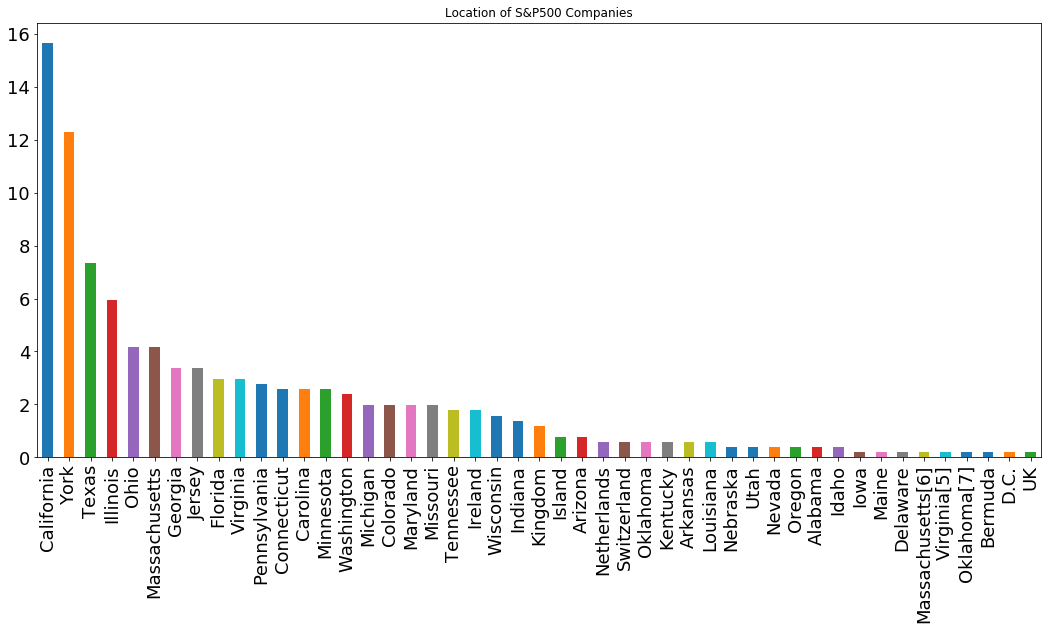

In [16]:
(df.Location.str.split().str[-1].value_counts(normalize=True).head(60)*100).round(2).plot(kind='bar',
title='Location of S&P500 Companies',figsize=(18,8),fontsize=18);

In [17]:
df.sort_values('Founded')[['SecurityName','Founded']].head(10)

,SecurityName,Founded
124,Colgate-Palmolive,1806
130,Consolidated Edison,1823
314,McKesson Corp.,1833
383,Procter & Gamble,1837
145,Deere & Co.,1837
372,Pfizer Inc.,1849
32,American Express Co,1850
490,Western Union Co,1851
134,Corning Inc.,1851
215,General Mills,1856


In [18]:
(df.Sector.value_counts(normalize=True)*100).round(2)

Industrials               13.66
Financials                13.47
Information Technology    13.47
Consumer Discretionary    12.87
Health Care               12.08
Consumer Staples           6.53
Real Estate                6.34
Energy                     5.94
Utilities                  5.54
Communication Services     5.15
Materials                  4.95
Name: Sector, dtype: float64

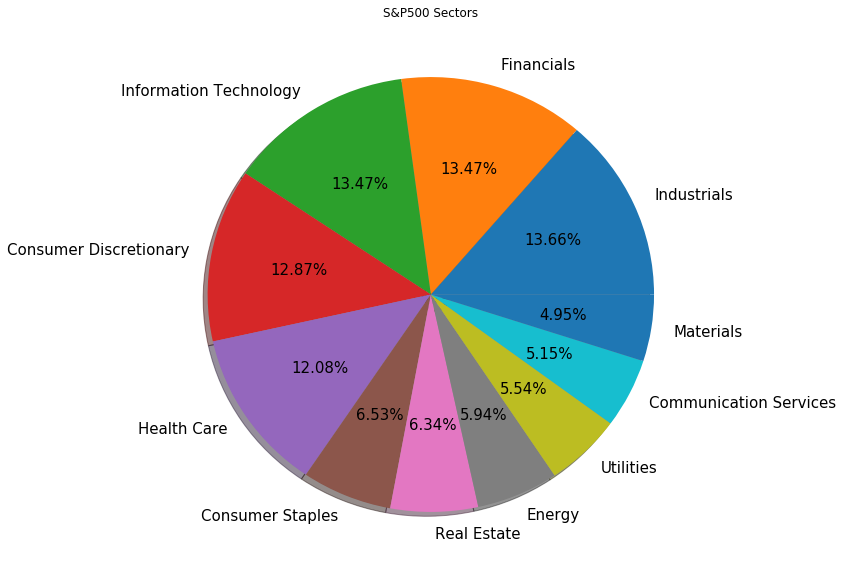

In [19]:
df.Sector.value_counts().plot(kind='pie',title='S&P500 Sectors',autopct='%.2f%%',figsize=(10,10),shadow=True,fontsize=15)
plt.axis('off');

In [20]:
df.groupby(['Sub_Industry']).size().sort_values(ascending=False).head(10)

Sub_Industry
Health Care Equipment                 19
Oil & Gas Exploration & Production    14
Semiconductors                        13
Electric Utilities                    13
Packaged Foods & Meats                12
Aerospace & Defense                   12
Internet Software & Services          12
Industrial Machinery                  12
Multi-Utilities                       12
Regional Banks                        12
dtype: int64

In [21]:
sub_sector= df.groupby(['Sector','Sub_Industry'])['Symbol'].count().unstack(level = -1,fill_value=0)

In [22]:
sub_sector

Sub_Industry,Advertising,Aerospace & Defense,Agricultural & Farm Machinery,Agricultural Products,Air Freight & Logistics,Airlines,Apparel Retail,"Apparel, Accessories & Luxury Goods",Application Software,Asset Management & Custody Banks,...,Specialty Stores,Steel,Systems Software,"Technology Hardware, Storage & Peripherals",Thrifts & Mortgage Finance,Tires & Rubber,Tobacco,Trading Companies & Distributors,Trucking,Water Utilities
Sector,,,,,,,,,,,,,,,,,,,,,
Communication Services,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Consumer Discretionary,0,0,0,0,0,0,5,10,0,0,...,6,0,0,0,0,1,0,0,0,0
Consumer Staples,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
Energy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Financials,0,0,0,0,0,0,0,0,0,9,...,0,0,0,0,1,0,0,0,0,0
Health Care,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Industrials,0,12,1,0,4,5,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
Information Technology,0,0,0,0,0,0,0,0,7,0,...,0,0,3,6,0,0,0,0,0,0
Materials,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


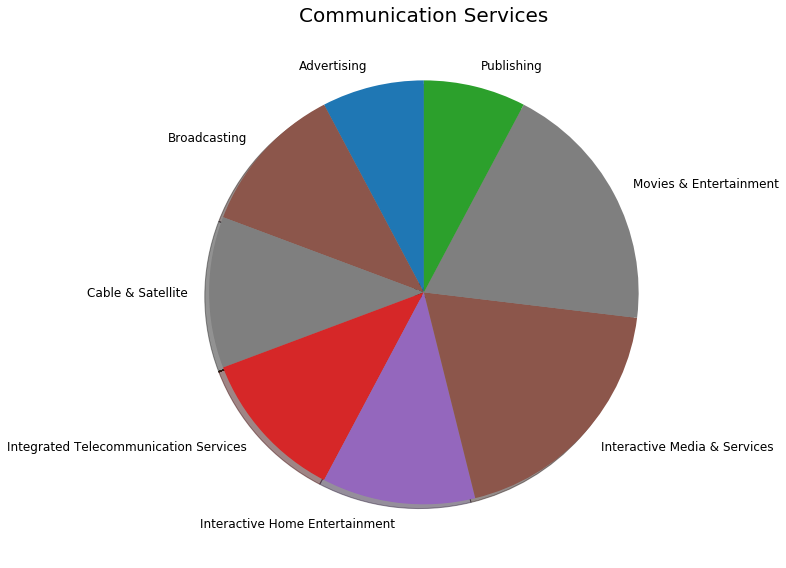

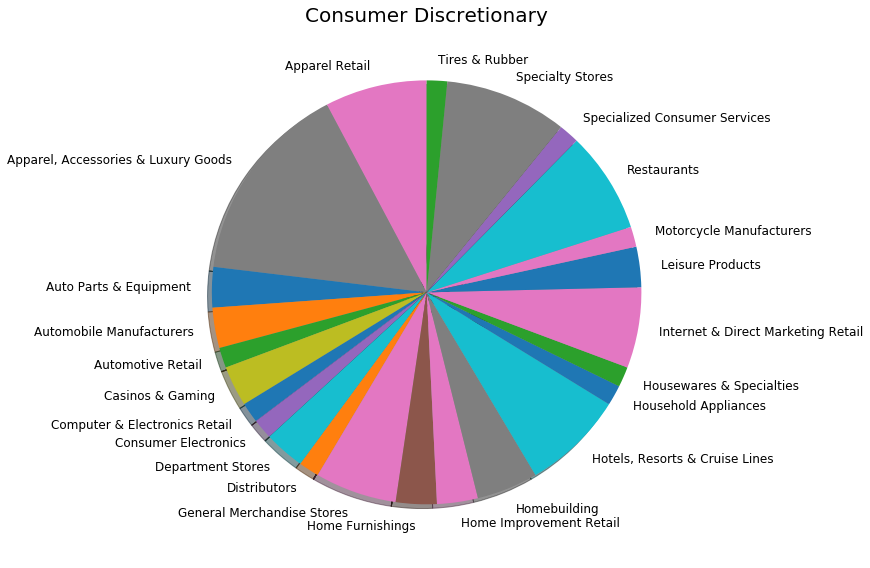

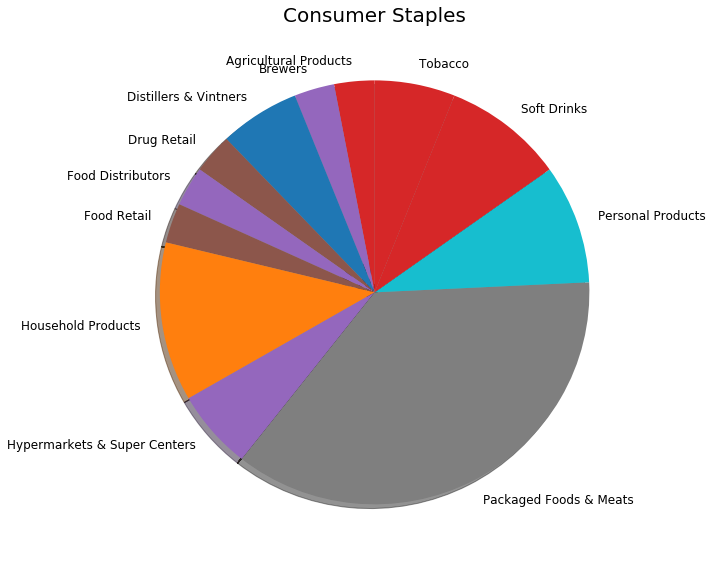

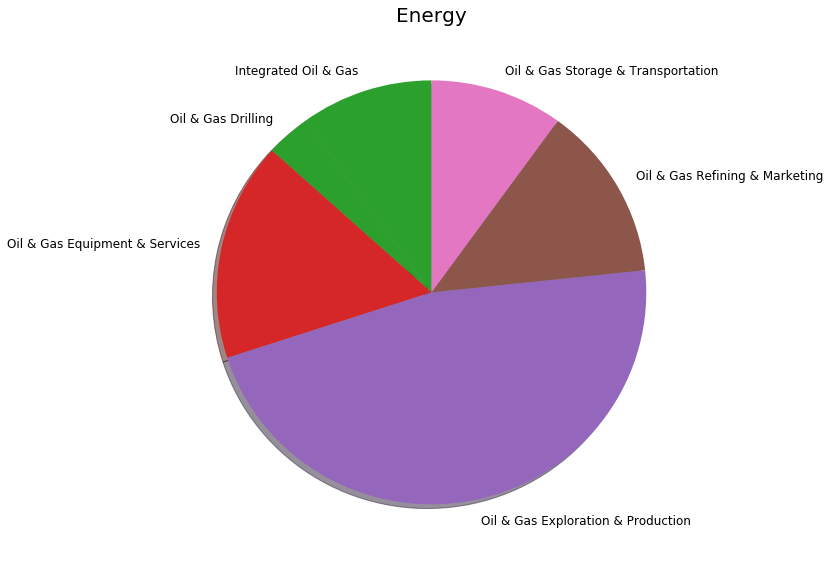

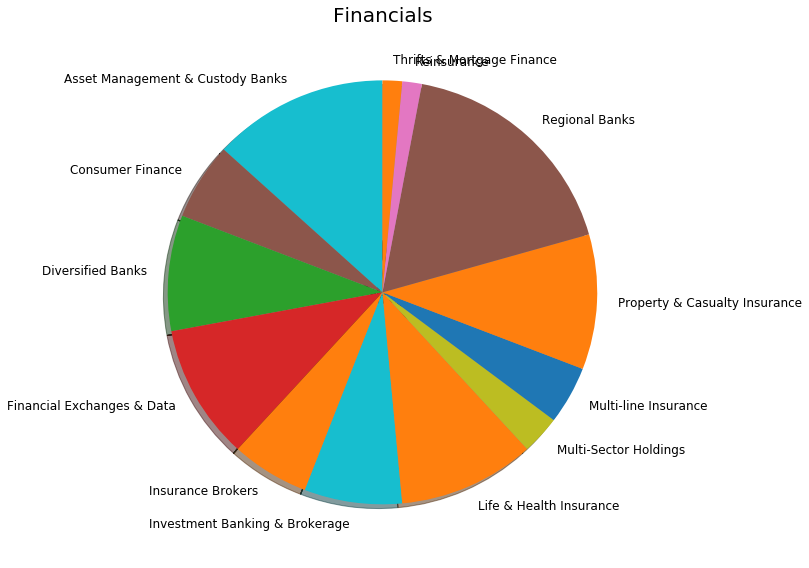

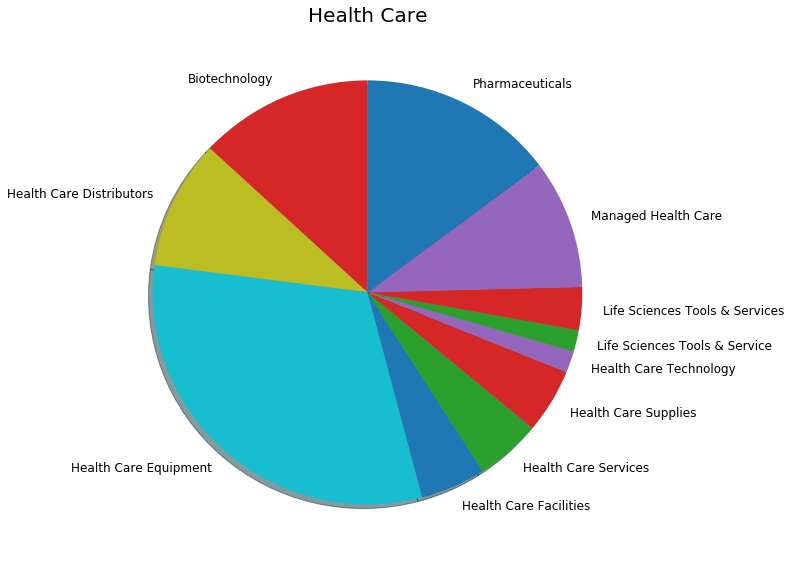

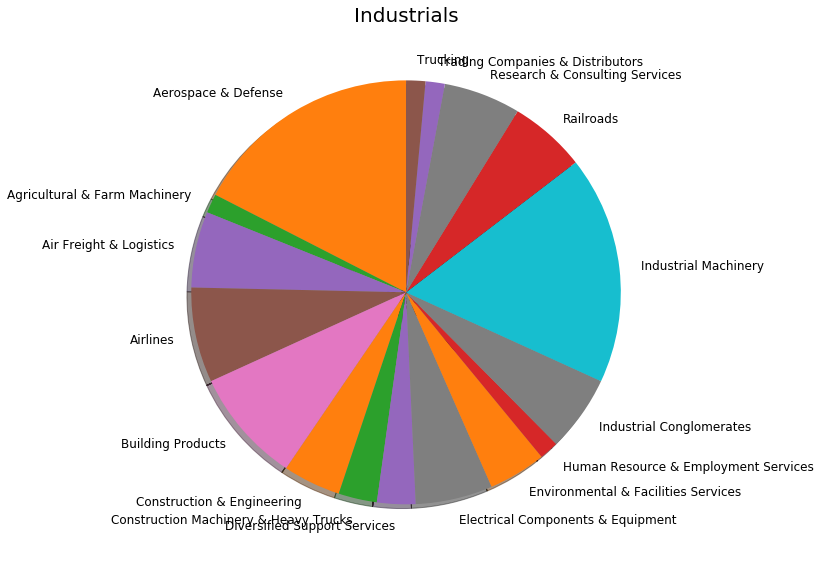

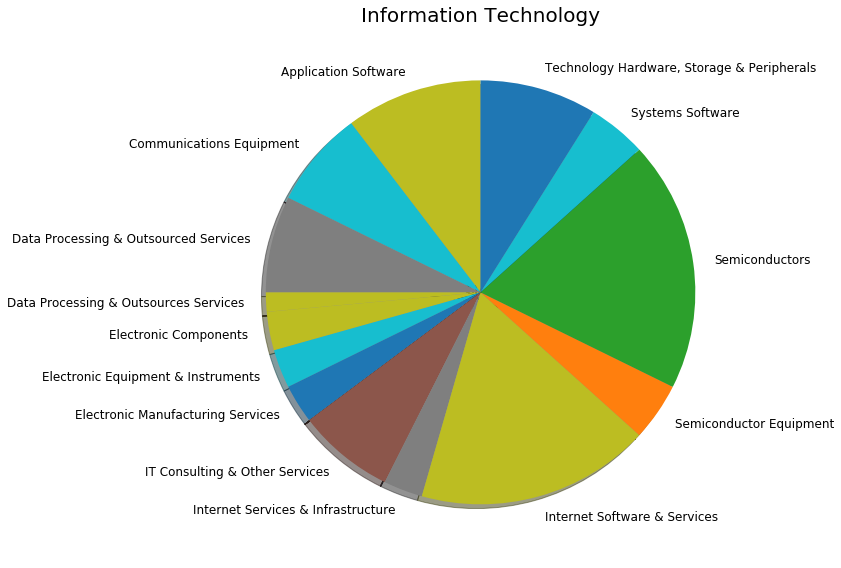

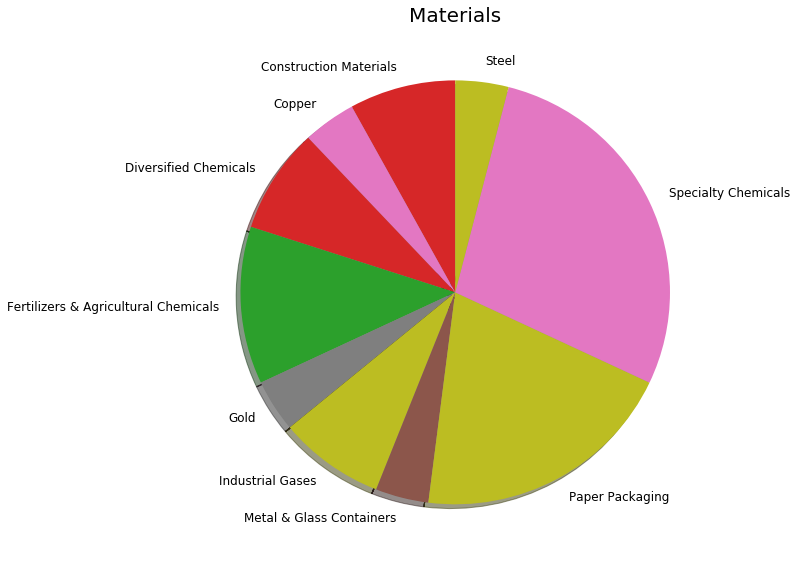

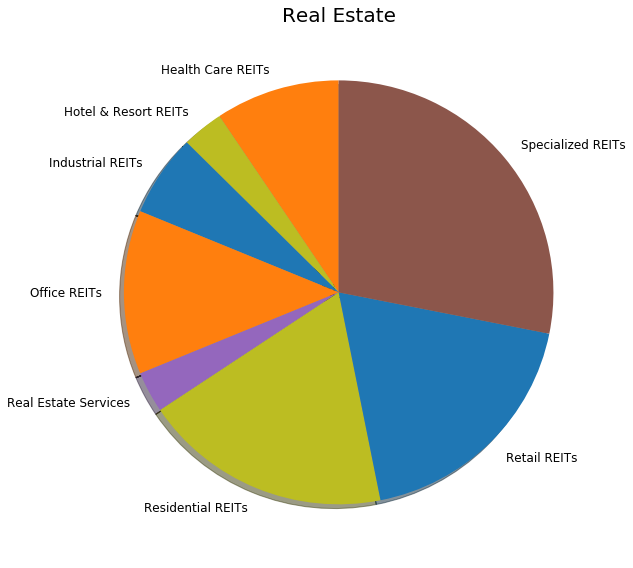

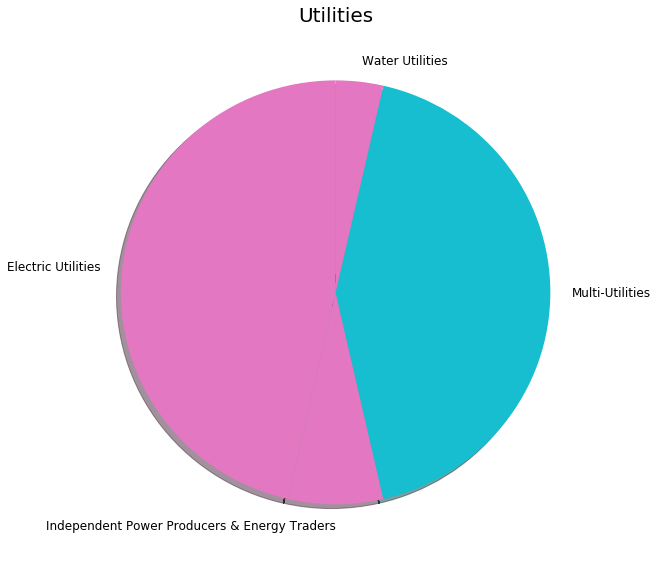

In [23]:
for i, x in enumerate(sub_sector.iterrows()):
    plt.figure()
    sub_sector.iloc[i,:].plot.pie(shadow=True,fontsize=12, figsize=(8,8),startangle=90)
    plt.title(sub_sector.index[i], fontsize=20)
    plt.tight_layout()
    plt.axis('off');   

In [29]:
Symbols = df.Symbol.tolist()

In [30]:
# Web scraper for Market Cap information 

def get_MktCap( symbol ):
    try:
        url = r'http://finviz.com/quote.ashx?t={}'.format(symbol.lower())
        html = u.request.urlopen(url).read()
        soup = bs(html, 'lxml')
        mc =  soup.find(text = r'Market Cap')
        mc_ = mc.find_next(class_='snapshot-td2').text
        return mc_
    except Exception as e:
        print(e)
        
MrktCap = pd.Series(index=Symbols)
for sym in Symbols:
    MrktCap[sym] = get_MktCap(sym)

HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found


In [31]:
MrktCap.isnull().sum()

3

In [32]:
MrktCap_df = MrktCap.to_frame().reset_index()

In [33]:
MrktCap_df.head()

,index,0
0,MMM,112.61B
1,ABT,124.45B
2,ABBV,132.32B
3,ABMD,14.98B
4,ACN,96.75B


In [34]:
MrktCap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 2 columns):
index    505 non-null object
0        502 non-null object
dtypes: object(2)
memory usage: 8.0+ KB


In [35]:
len(MrktCap_df)

505

In [36]:
MrktCap_df.columns=(['Symbol', 'MktCap'])

In [37]:
MrktCap_df.head()

,Symbol,MktCap
0,MMM,112.61B
1,ABT,124.45B
2,ABBV,132.32B
3,ABMD,14.98B
4,ACN,96.75B


In [38]:
combo = pd.merge(df, MrktCap_df, on='Symbol')

In [39]:
combo.head()

,Symbol,SecurityName,Sector,Sub_Industry,Location,Founded,MktCap
0,MMM,3M Company,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1902,112.61B
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1888,124.45B
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals,"North Chicago, Illinois",2013 (1888),132.32B
3,ABMD,ABIOMED Inc,Health Care,Health Care Equipment,"Danvers, Massachusetts",1981,14.98B
4,ACN,Accenture plc,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",1989,96.75B


In [41]:
combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 0 to 504
Data columns (total 7 columns):
Symbol          505 non-null object
SecurityName    505 non-null object
Sector          505 non-null object
Sub_Industry    505 non-null object
Location        505 non-null object
Founded         174 non-null object
MktCap          502 non-null object
dtypes: object(7)
memory usage: 31.6+ KB


In [42]:
combo.loc[:, 'MktCap'] = pd.to_numeric(combo['MktCap'].str[:-1])

In [43]:
combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 0 to 504
Data columns (total 7 columns):
Symbol          505 non-null object
SecurityName    505 non-null object
Sector          505 non-null object
Sub_Industry    505 non-null object
Location        505 non-null object
Founded         174 non-null object
MktCap          498 non-null float64
dtypes: float64(1), object(6)
memory usage: 31.6+ KB


In [44]:
combo.head()

,Symbol,SecurityName,Sector,Sub_Industry,Location,Founded,MktCap
0,MMM,3M Company,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1902,112.61
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1888,124.45
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals,"North Chicago, Illinois",2013 (1888),132.32
3,ABMD,ABIOMED Inc,Health Care,Health Care Equipment,"Danvers, Massachusetts",1981,14.98
4,ACN,Accenture plc,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",1989,96.75


In [45]:
combo.isnull().sum()

Symbol            0
SecurityName      0
Sector            0
Sub_Industry      0
Location          0
Founded         331
MktCap            7
dtype: int64

In [46]:
combo[combo.MktCap.isnull()]

,Symbol,SecurityName,Sector,Sub_Industry,Location,Founded,MktCap
70,BRK.B,Berkshire Hathaway,Financials,Multi-Sector Holdings,"Omaha, Nebraska",NaN,NaN
84,BF.B,Brown-Forman Corp.,Consumer Staples,Distillers & Vintners,"Louisville, Kentucky",NaN,NaN
90,CPRI,Capri Holdings,Consumer Discretionary,"Apparel, Accessories & Luxury Goods","New York, New York",NaN,NaN
153,DISCK,Discovery Inc. Class C,Communication Services,Broadcasting,"Silver Spring, Maryland",NaN,NaN
343,NWS,News Corp. Class B,Communication Services,Publishing,"New York, New York",NaN,NaN
453,FOX,Twenty-First Century Fox Class B,Communication Services,Movies & Entertainment,"New York, New York",NaN,NaN
459,UA,Under Armour Class C,Consumer Discretionary,"Apparel, Accessories & Luxury Goods","Baltimore, Maryland",NaN,NaN


In [47]:
combo.describe().round(2)

,MktCap
count,498.00
mean,46.81
std,90.68
min,3.39
25%,11.71
50%,19.14
75%,42.91
max,794.04


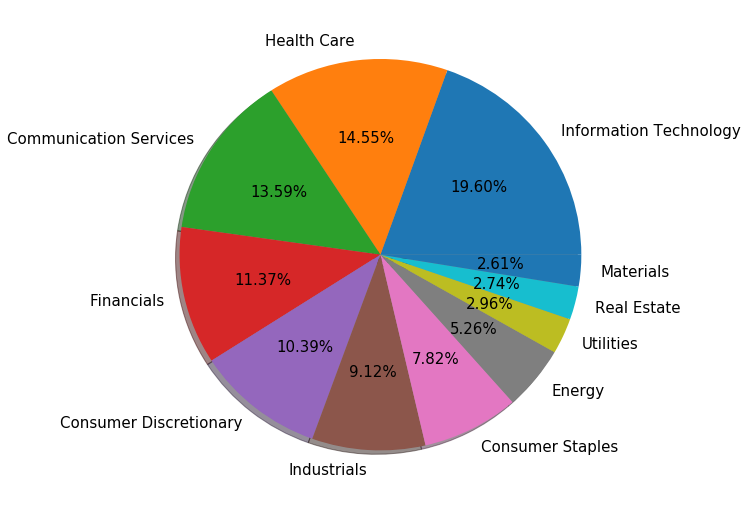

In [48]:
combo.groupby('Sector')['MktCap'].sum().sort_values( ascending=False).plot.pie(autopct='%.2f%%',figsize=(9,9),
shadow=True,fontsize=15);plt.axis('off');

In [49]:
combo.groupby('Sub_Industry')['MktCap'].sum().sort_values()

Sub_Industry
Tires & Rubber                                   5.09
Specialized Consumer Services                    5.30
Thrifts & Mortgage Finance                       5.55
Oil & Gas Drilling                               5.72
Multi-Sector Holdings                            5.83
Motorcycle Manufacturers                         6.05
Publishing                                       6.96
Human Resource & Employment Services             7.14
Household Appliances                             7.84
Distributors                                     8.16
Reinsurance                                      8.57
Housewares & Specialties                         9.29
Trading Companies & Distributors                 9.76
Trucking                                        10.57
Automotive Retail                               12.15
Brewers                                         12.61
Consumer Electronics                            12.76
Hotel & Resort REITs                            12.92
Home Furnishing

In [50]:
table = pd.pivot_table(combo,index=["Sector"],values=["MktCap"],aggfunc=np.sum)
table

,MktCap
Sector,
Communication Services,3168.45
Consumer Discretionary,2421.03
Consumer Staples,1823.98
Energy,1226.43
Financials,2650.22
Health Care,3391.27
Industrials,2125.35
Information Technology,4568.57
Materials,608.65


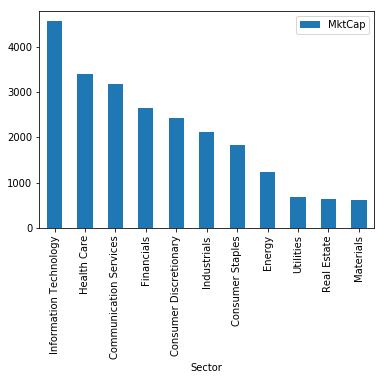

In [51]:
table.sort_values(by='MktCap', ascending=False).plot(kind='bar')

In [52]:
combo.groupby(df.Location.str.split().str[-1])['MktCap'].sum().sort_values(ascending=False).head(10)

Location
California       6371.26
York             2848.88
Washington       1875.35
Texas            1367.68
Illinois         1325.55
Jersey           1044.14
Georgia           786.87
Massachusetts     656.75
Minnesota         650.15
Ohio              625.16
Name: MktCap, dtype: float64

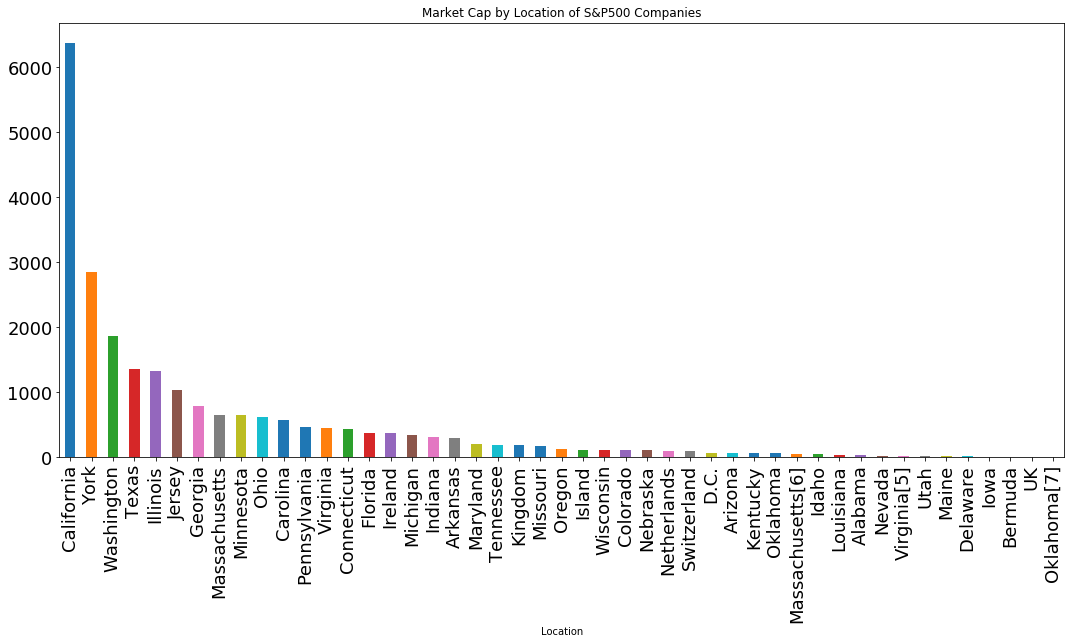

In [53]:
combo.groupby(df.Location.str.split().str[-1])['MktCap'].sum().sort_values(ascending=False).plot(kind='bar',
title='Market Cap by Location of S&P500 Companies',figsize=(18,8),fontsize=18);

In [54]:
pd.pivot_table(combo,index='Sector',values='MktCap',aggfunc='max' )

,MktCap
Sector,
Communication Services,732.83
Consumer Discretionary,792.72
Consumer Staples,275.39
Energy,309.31
Financials,338.96
Health Care,345.57
Industrials,197.43
Information Technology,794.04
Materials,127.12


In [55]:
combo.SecurityName[combo.groupby('Sector')['MktCap'].idxmax()]

25     Alphabet Inc Class A
28          Amazon.com Inc.
480                 Walmart
187       Exxon Mobil Corp.
272    JPMorgan Chase & Co.
270       Johnson & Johnson
75           Boeing Company
322         Microsoft Corp.
159               DowDuPont
34     American Tower Corp.
344          NextEra Energy
Name: SecurityName, dtype: object

In [56]:
combo.iloc[combo.groupby('Sector')['MktCap'].idxmax()].sort_values(by='MktCap',ascending=False)

,Symbol,SecurityName,Sector,Sub_Industry,Location,Founded,MktCap
322,MSFT,Microsoft Corp.,Information Technology,Systems Software,"Redmond, Washington",1975,794.04
28,AMZN,Amazon.com Inc.,Consumer Discretionary,Internet & Direct Marketing Retail,"Seattle, Washington",1994,792.72
25,GOOGL,Alphabet Inc Class A,Communication Services,Interactive Media & Services,"Mountain View, California",1998,732.83
270,JNJ,Johnson & Johnson,Health Care,Health Care Equipment,"New Brunswick, New Jersey",1886,345.57
272,JPM,JPMorgan Chase & Co.,Financials,Diversified Banks,"New York, New York",NaN,338.96
187,XOM,Exxon Mobil Corp.,Energy,Integrated Oil & Gas,"Irving, Texas",1999,309.31
480,WMT,Walmart,Consumer Staples,Hypermarkets & Super Centers,"Bentonville, Arkansas",NaN,275.39
75,BA,Boeing Company,Industrials,Aerospace & Defense,"Chicago, Illinois",1916,197.43
159,DWDP,DowDuPont,Materials,Diversified Chemicals,"Midland, Michigan",2017,127.12
344,NEE,NextEra Energy,Utilities,Multi-Utilities,"Juno Beach, Florida",NaN,81.29


,Symbol,SecurityName,Sector,Sub_Industry,Location,Founded,MktCap
322,MSFT,Microsoft Corp.,Information Technology,Systems Software,"Redmond, Washington",1975,794.04
28,AMZN,Amazon.com Inc.,Consumer Discretionary,Internet & Direct Marketing Retail,"Seattle, Washington",1994,792.72
25,GOOGL,Alphabet Inc Class A,Communication Services,Interactive Media & Services,"Mountain View, California",1998,732.83
270,JNJ,Johnson & Johnson,Health Care,Health Care Equipment,"New Brunswick, New Jersey",1886,345.57
272,JPM,JPMorgan Chase & Co.,Financials,Diversified Banks,"New York, New York",NaN,338.96
187,XOM,Exxon Mobil Corp.,Energy,Integrated Oil & Gas,"Irving, Texas",1999,309.31
480,WMT,Walmart,Consumer Staples,Hypermarkets & Super Centers,"Bentonville, Arkansas",NaN,275.39
75,BA,Boeing Company,Industrials,Aerospace & Defense,"Chicago, Illinois",1916,197.43
159,DWDP,DowDuPont,Materials,Diversified Chemicals,"Midland, Michigan",2017,127.12
344,NEE,NextEra Energy,Utilities,Multi-Utilities,"Juno Beach, Florida",NaN,81.29


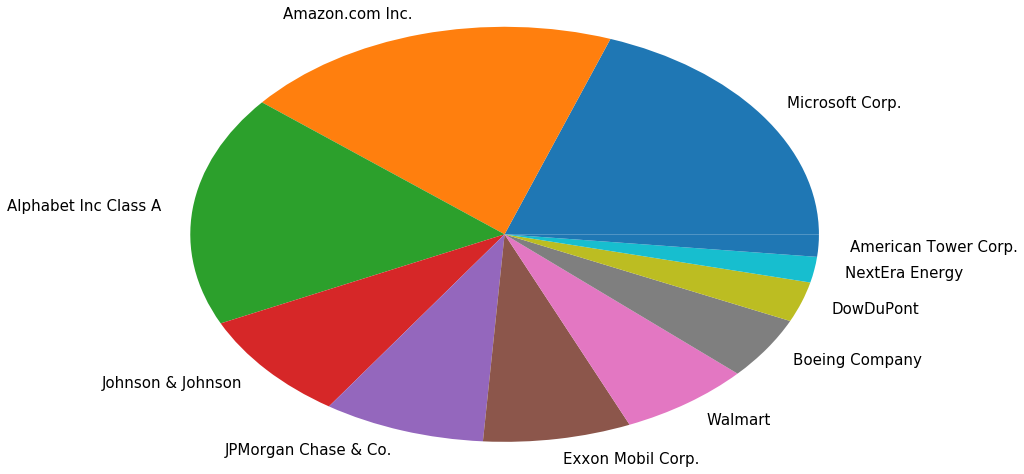

In [57]:
cc = combo.iloc[combo.groupby('Sector')['MktCap'].idxmax()].sort_values(by='MktCap',ascending=False)
cc[['Symbol' ,'MktCap']].plot(y='MktCap', kind='pie', labels=cc['SecurityName'], legend=None, radius=2, fontsize=15)
plt.tight_layout();plt.axis('off');cc

In [58]:
cc

,Symbol,SecurityName,Sector,Sub_Industry,Location,Founded,MktCap
322,MSFT,Microsoft Corp.,Information Technology,Systems Software,"Redmond, Washington",1975,794.04
28,AMZN,Amazon.com Inc.,Consumer Discretionary,Internet & Direct Marketing Retail,"Seattle, Washington",1994,792.72
25,GOOGL,Alphabet Inc Class A,Communication Services,Interactive Media & Services,"Mountain View, California",1998,732.83
270,JNJ,Johnson & Johnson,Health Care,Health Care Equipment,"New Brunswick, New Jersey",1886,345.57
272,JPM,JPMorgan Chase & Co.,Financials,Diversified Banks,"New York, New York",NaN,338.96
187,XOM,Exxon Mobil Corp.,Energy,Integrated Oil & Gas,"Irving, Texas",1999,309.31
480,WMT,Walmart,Consumer Staples,Hypermarkets & Super Centers,"Bentonville, Arkansas",NaN,275.39
75,BA,Boeing Company,Industrials,Aerospace & Defense,"Chicago, Illinois",1916,197.43
159,DWDP,DowDuPont,Materials,Diversified Chemicals,"Midland, Michigan",2017,127.12
344,NEE,NextEra Energy,Utilities,Multi-Utilities,"Juno Beach, Florida",NaN,81.29


In [59]:
combo[combo['Symbol'] =='GOOG']

,Symbol,SecurityName,Sector,Sub_Industry,Location,Founded,MktCap
26,GOOG,Alphabet Inc Class C,Communication Services,Interactive Media & Services,"Mountain View, California",1998,731.75


In [60]:
combo.describe().round(2)

,MktCap
count,498.00
mean,46.81
std,90.68
min,3.39
25%,11.71
50%,19.14
75%,42.91
max,794.04


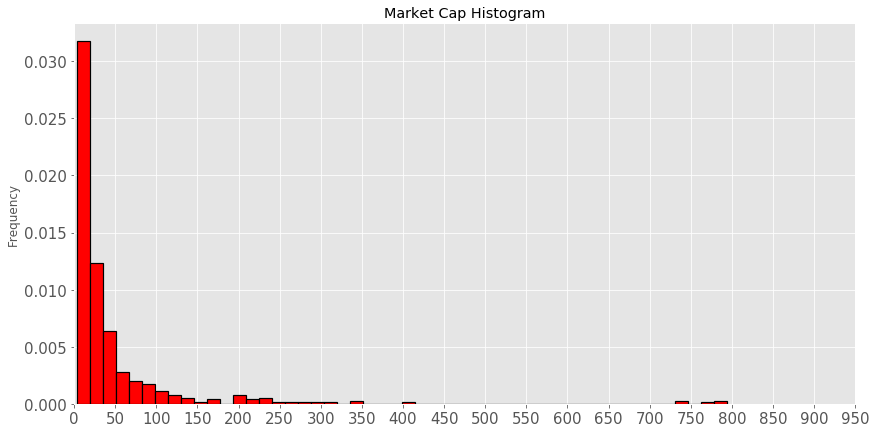

In [61]:
plt.style.use('ggplot')
combo.MktCap.plot(kind='hist', bins=50,xticks=range(0,1000,50), figsize=(14,7), xlim=0, 
fontsize=15, color='red',edgecolor='black',lw=1.2, title='Market Cap Histogram',density=True);

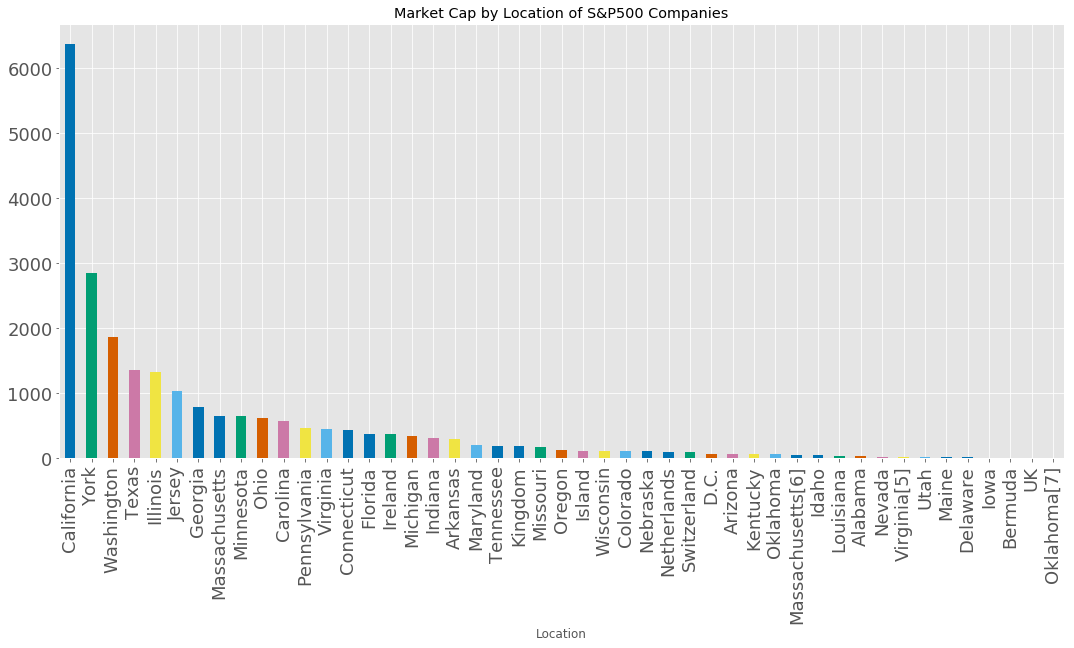

In [62]:
plt.style.use('seaborn-colorblind')
combo.groupby(df.Location.str.split().str[-1])['MktCap'].sum().sort_values(ascending=False).plot(kind='bar',
title='Market Cap by Location of S&P500 Companies',figsize=(18,8),fontsize=18);

In [63]:
combo.MktCap.sum()

23312.46

In [64]:
combo.MktCap.max()/ combo.MktCap.sum()

0.0340607554929853

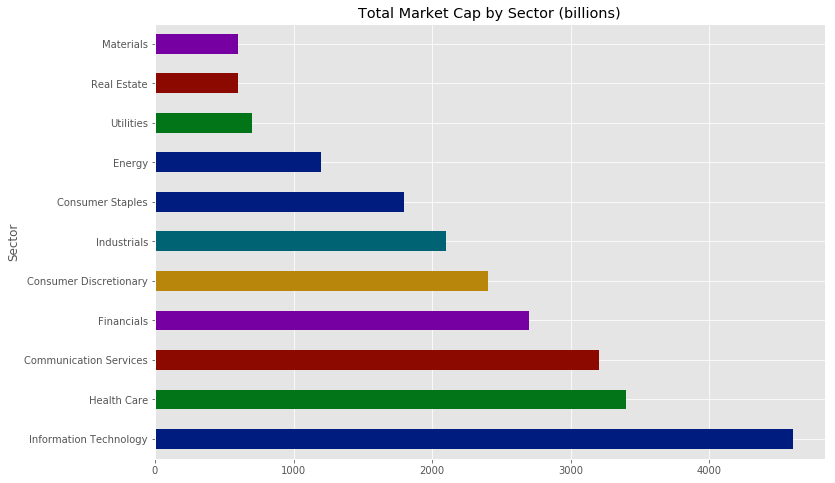

In [66]:
plt.style.use('seaborn-dark-palette')
combo.groupby('Sector')['MktCap'].sum().round(-2).sort_values(ascending=False).plot(kind='barh',
title='Total Market Cap by Sector (billions)', figsize=(12,8));

In [67]:
pd.crosstab(combo.Sector, combo.Location.str.split().str[-1]).sum().sort_values(ascending=False).head()

Location
California       79
York             62
Texas            37
Illinois         30
Massachusetts    21
dtype: int64

In [68]:
combo.groupby('Sector')['MktCap'].sum().round(-2).sort_values(ascending=False)

Sector
Information Technology    4600.0
Health Care               3400.0
Communication Services    3200.0
Financials                2700.0
Consumer Discretionary    2400.0
Industrials               2100.0
Consumer Staples          1800.0
Energy                    1200.0
Utilities                  700.0
Real Estate                600.0
Materials                  600.0
Name: MktCap, dtype: float64